In [1]:
# Libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Carregando dados
d1 = np.load('Dados_1.npy'); d1 = d1[:,0:200] # eliminar NaN
d2 = np.load('Dados_2.npy'); d2 = d2[:,0:200] # eliminar NaN
d3 = np.load('Dados_3.npy'); d3 = d3[:,0:200] # eliminar NaN
cl = np.load('Classes.npy', allow_pickle=True)
labels = np.array([])
num_samples = 50000
for ind in range(num_samples):
    if cl[ind,0]=='Classe A':
        labels=np.append(labels,0)
    if cl[ind,0]=='Classe B':
        labels=np.append(labels,0.25)
    if cl[ind,0]=='Classe C':
        labels=np.append(labels,0.50)
    if cl[ind,0]=='Classe D':
        labels=np.append(labels,0.75)
    if cl[ind,0]=='Classe E':
        labels=np.append(labels,1)
# Aplicando MinMaxScaler
scaler = MinMaxScaler()
d1_scaled    = scaler.fit_transform(d1)
d2_scaled    = scaler.fit_transform(d2)
d3_scaled    = scaler.fit_transform(d3)
labels = np.transpose(labels)
#label_scaled = scaler.fit_transform([labels])
# Há um código para preparar sequencias, vou omitor

In [2]:
# Conjunto de treino e teste
num_samples = 50000
split = int(0.8 * num_samples)
train_d1, test_d1 = d1_scaled[:split,0:200], d1_scaled[split:,0:200]
train_d2, test_d2 = d2_scaled[:split,0:200], d2_scaled[split:,0:200]
train_d3, test_d3 = d3_scaled[:split,0:200], d3_scaled[split:,0:200]
train_labels, test_labels = labels[:split], labels[split:]

train_d = np.concatenate((train_d1, train_d2, train_d3), axis=1)
test_d  = np.concatenate((test_d1, test_d2, test_d3), axis=1)

In [9]:
from keras.models import Sequential  
from keras.layers import *  

modelo = Sequential()
modelo.add(Dense(units=10,input_shape=(600,))) #hidden layer 1 with input
modelo.add(Dense(units=1)) #output layer

# Compilar o modelo
modelo.compile(optimizer='adam', loss='mean_squared_error')
# Treinar o modelo
history = modelo.fit(train_d, train_labels, epochs = 50, batch_size = 32,
                    validation_split=0.2)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1492 - val_loss: 0.1422
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1362 - val_loss: 0.1309
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1340 - val_loss: 0.1247
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1312 - val_loss: 0.1424
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1296 - val_loss: 0.1245
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1277 - val_loss: 0.1265
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1259 - val_loss: 0.1285
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1256 - val_loss: 0.1297
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1256 - val_loss: 0.1235
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.125

In [ ]:
# Evaluate the model
loss = modelo.evaluate(test_d, test_labels)
print("Test Loss:", loss)

predi = modelo.predict(test_d)
print(test_labels[2])
print(predi[2])


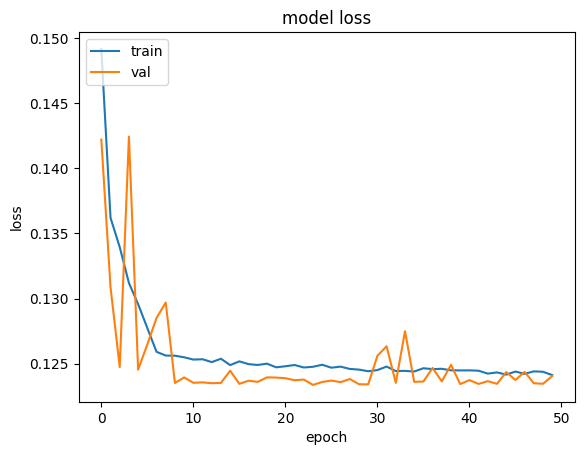

In [10]:
import matplotlib.pyplot as plt
#modelo.summary()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()